<a href="https://colab.research.google.com/github/life-ofpi/TansoZero-Data/blob/main/Regional_Net_Zero_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
base_path = "/content/drive/MyDrive/2025_SI/project"
# 지역별 발전 설비
df_gen = pd.read_csv(f"{base_path}/HOME_발전설비_연료원별.csv", encoding='cp949')
df_market = pd.read_csv(f"{base_path}/HOME_전력거래_시장참여설비용량(전력시장·PPA)_연료원별.csv", encoding='cp949')
df_contract = pd.read_excel(f"{base_path}/신재생에너지 계약 현황 목록.xlsx")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 전처리

In [35]:
# df_gen 전처리 (HOME_발전설비_연료원별)

# 1. 컬럼명 정의
df_gen.columns = ['기간', '회원구분', '급전방식', '사업구분', '지역', '원자력', '유연탄', '무연탄', '유류', 'LNG',
                  '양수', '연료전지', '석탄가스화', '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타', '합계']

# 2. 첫 번째 행 제거 (헤더 중복일 경우)
df_gen = df_gen.iloc[1:].reset_index(drop=True)

# 3. '지역' 컬럼이 '소계'인 행 제거
df_gen = df_gen[~df_gen['지역'].isin(['소계'])].reset_index(drop=True)

# 4. 숫자형 컬럼 변환
numeric_columns = ['원자력', '유연탄', '무연탄', '유류', 'LNG', '양수', '연료전지', '석탄가스화',
                   '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타', '합계']

for col in numeric_columns:
    df_gen[col] = pd.to_numeric(df_gen[col], errors='coerce')

# 5. 기간 컬럼 처리 (예: Apr-25 형식일 경우)
df_gen['기간'] = pd.to_datetime(df_gen['기간'], format='%Y/%m', errors='coerce')

# 6. 불필요한 컬럼 제거
df_gen = df_gen.drop(['회원구분', '급전방식', '사업구분'], axis=1)

# 7. 결측치 처리
df_gen = df_gen.fillna(0)

print(df_gen.head())




          기간  지역     원자력     유연탄  무연탄     유류       LNG   양수     연료전지  석탄가스화  \
0 2025-04-01  서울     0.0     0.0  0.0   0.00   802.346  0.0   87.230    0.0   
1 2025-04-01  부산  4550.0    19.0  0.0   0.00  1845.836  0.0   40.480    0.0   
2 2025-04-01  대구     0.0    72.9  0.0   0.00   640.700  0.0    4.110    0.0   
3 2025-04-01  인천     0.0  5080.0  0.0  36.23  8576.747  0.0  265.105    0.0   
4 2025-04-01  광주     0.0     0.0  0.0   0.00   115.246  0.0   21.035    0.0   

          태양광      풍력      수력   해양     바이오  폐기물     기타            합계  
0   47.804115   0.000   0.000  0.0   5.800  0.0  27.95    971.130115  
1  275.201300   0.762   0.020  0.0   4.574  0.0  33.90   6769.773300  
2  390.474086   0.000   3.560  0.0   3.000  0.0   9.90   1124.644086  
3  181.415635  49.000  12.599  0.0  76.330  0.0  30.78  14308.206635  
4  361.414001   0.000   1.830  0.0   2.120  0.0   3.96    505.605001  


In [36]:
# df_market 전처리 (HOME_전력거래_시장참여설비용량(전력시장·PPA)_연료원별)

# 1. 컬럼명 정의
df_market.columns = ['기간', '지역', '원자력', '유연탄', '무연탄','석탄 합계', '유류', 'LNG', '양수', '연료전지', '석탄가스화', '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '신재생 합계', '기타', '합계']

# 2. 첫 번째 행 제거 (헤더 중복일 경우)
df_market = df_market.iloc[1:].reset_index(drop=True)

# 3. '지역' 컬럼이 '소계'인 행 제거
df_market = df_market[~df_market['지역'].isin(['소계'])].reset_index(drop=True)



# 4. 숫자형 컬럼 변환
numeric_columns = ['원자력', '유연탄', '무연탄', '유류', 'LNG', '양수', '연료전지', '석탄가스화',
                   '태양광', '풍력', '수력', '해양', '바이오', '폐기물', '기타']

for col in numeric_columns:
    df_market[col] = pd.to_numeric(df_market[col], errors='coerce')

# 5. 기간 컬럼 처리 (예: Apr-25 형식일 경우)
df_market['기간'] = pd.to_datetime(df_market['기간'], format='%Y/%m', errors='coerce')

# 6. 결측치 처리
df_market = df_market.fillna(0)

print(df_market.head())

          기간  지역     원자력     유연탄  무연탄 석탄 합계   유류       LNG   양수    연료전지  \
0 2025-03-01  서울     0.0     0.0    0     0  0.0   850.428  0.0   86.63   
1 2025-03-01  부산  4550.0    19.0    0    19  0.0  1895.986  0.0   40.48   
2 2025-03-01  대구     0.0    72.9    0  72.9  0.0   685.000  0.0    3.90   
3 2025-03-01  인천     0.0  5080.0    0  5080  0.0  8597.147  0.0  265.00   
4 2025-03-01  광주     0.0     0.0    0     0  0.0   115.246  0.0   20.72   

   석탄가스화      태양광     풍력      수력   해양     바이오    폐기물              신재생 합계  \
0    0.0   18.488   0.00   0.000  0.0   6.865  32.95             144.933   
1    0.0  147.520   0.75   0.000  0.0   5.069  39.70  233.51899999999992   
2    0.0  113.791  11.55   4.060  0.0   3.000  15.60  151.90099999999998   
3    0.0   64.174  49.00  12.599  0.0  68.360  33.68  492.81300000000005   
4    0.0   80.542   0.00   1.830  0.0   2.120   1.26             106.472   

     기타         합계  
0  0.00    995.361  
1  0.00   6698.505  
2  0.00    909.801  
3  7.97 

In [37]:
# df_contract 전처리 (신재생에너지 계약 현황 목록)

# 1. 컬럼명 정리
df_contract.columns = ['발전원', '지역구분', '시도구분', '개수', '용량', '지역개수', '지역용량', '연도']

# 2. 첫 번째 행(헤더) 제거
df_contract = df_contract.iloc[1:].reset_index(drop=True)

# 3. 결측치 처리

df_contract['지역구분'] = df_contract['지역구분'].fillna('미상')

df_contract = df_contract.fillna(0)


# 4. 숫자형 컬럼 변환
numeric_columns = ['개수', '용량', '지역개수', '지역용량', '연도']

for col in numeric_columns:
    # 특수 문자열 처리
    df_contract[col] = df_contract[col].replace(['5호미만제거', '소계', '합계'], '0')
    # 문자열인 경우에만 쉼표 제거
    if df_contract[col].dtype == 'object':
        df_contract[col] = df_contract[col].str.replace(',', '')
    # 숫자형 변환
    df_contract[col] = pd.to_numeric(df_contract[col], errors='coerce')

# 5. 결측치 처리
df_market = df_market.fillna(0)
# 지역구분 컬럼명 변경을 위한 딕셔너리
replace_dict = {
    '강원특별자치도': '강원',
    '경기도': '경기',
    '경상북도': '경북',
    '경상남도': '경남',
    '전라북도': '전북',
    '전라남도': '전남',
    '전북특별자치도': '전북',
    '충청북도': '충북',
    '충청남도': '충남',
    '제주특별자치도': '제주',
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종'
}

# 지역구분 컬럼 값 일괄 변경
df_contract['지역구분'] = df_contract['지역구분'].replace(replace_dict)

df_contract


<ipython-input-37-24b0301b806e>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_contract = df_contract.fillna(0)


,발전원,지역구분,시도구분,개수,용량,지역개수,지역용량,연도
0,태양광,강원,강릉시,120,10046.06,1420.0,163529.16,2024
1,태양광,강원,고성군,116,11968.60,1420.0,163529.16,2024
2,태양광,강원,동해시,10,572.25,1420.0,163529.16,2024
3,태양광,강원,삼척시,34,10617.11,1420.0,163529.16,2024
4,태양광,강원,속초시,10,619.97,1420.0,163529.16,2024
...,...,...,...,...,...,...,...,...
2953,폐기물소각,강원,태백시,0,NaN,NaN,NaN,2012
2954,폐기물소각,경남,거창군,0,NaN,NaN,NaN,2012
2955,바이오에너지,대전,대덕구,0,NaN,NaN,NaN,2012
2956,바이오에너지,전북,정읍시,0,NaN,NaN,NaN,2012


# 지역별 클러스터링



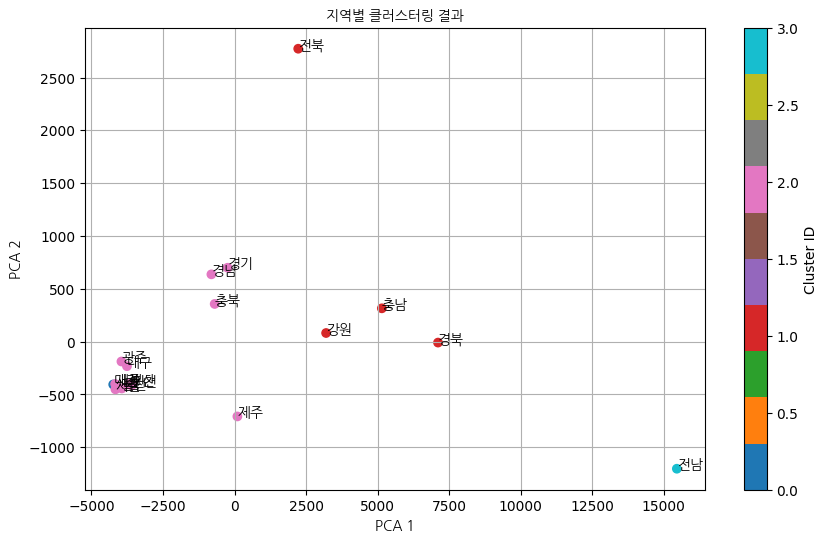

<Figure size 1500x800 with 0 Axes>

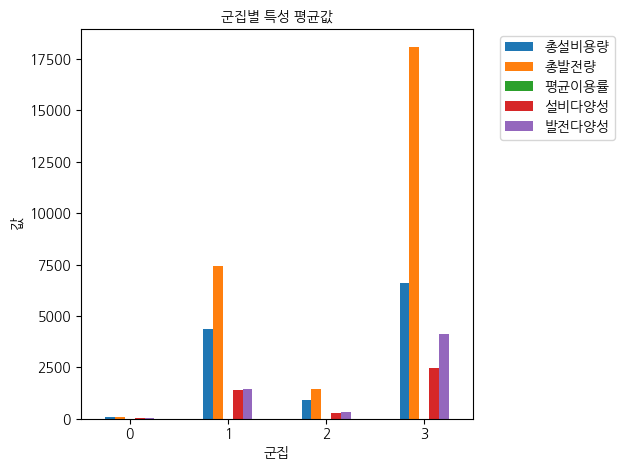


[군집별 특성 분석]
군집            3        2        1      0
총설비용량   6599.96   902.49  4341.04  63.75
총발전량   18061.15  1436.29  7449.93  86.24
평균이용률      2.44     2.41     2.48   0.94
설비다양성   2459.02   275.03  1390.33  25.98
발전다양성   4112.78   307.29  1458.47  24.65


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import font_manager as fm
font_path = "/content/drive/MyDrive/2025_SI/project/3.NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)


# 1. 데이터 준비
latest_year = df_gen['기간'].dt.year.max()

renewable_cols = ['태양광', '풍력', '수력', '해양', '바이오', '폐기물']
capacity_data = df_gen[df_gen['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].mean()
generation_data = df_market[df_market['기간'].dt.year == latest_year].groupby('지역')[renewable_cols].sum()
efficiency = generation_data / capacity_data.replace(0, np.nan)

# 2. 특성 생성 함수
def create_cluster_features(capacity_data, generation_data, efficiency):
    features = pd.DataFrame(index=capacity_data.index)
    features['총설비용량'] = capacity_data.sum(axis=1)
    features['총발전량'] = generation_data.sum(axis=1)
    features['평균이용률'] = efficiency.replace(0, np.nan).mean(axis=1).fillna(0)
    features['설비다양성'] = capacity_data.std(axis=1).fillna(0)
    features['발전다양성'] = generation_data.std(axis=1).fillna(0)
    return features.replace([np.inf, -np.inf], 0)

# 3. 클러스터링 실행
features = create_cluster_features(capacity_data, generation_data, efficiency)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled)

# 4. 결과 시각화 (PCA로 2차원 축소)
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=clusters, cmap='tab10')

# 지역명 표시
for i, name in enumerate(features.index):
    plt.annotate(name, (reduced[i, 0], reduced[i, 1]), fontproperties=font_prop)

plt.title("지역별 클러스터링 결과", fontproperties=font_prop)
plt.xlabel("PCA 1", fontproperties=font_prop)
plt.ylabel("PCA 2", fontproperties=font_prop)
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

# 5. 군집별 특성 분석
def analyze_clusters(features, clusters, font_prop):
    cluster_analysis = features.copy()
    cluster_analysis['군집'] = clusters
    cluster_means = cluster_analysis.groupby('군집').mean()

    # 군집별 특성 시각화
    plt.figure(figsize=(15, 8))
    cluster_means.plot(kind='bar')
    plt.title('군집별 특성 평균값', fontproperties=font_prop)
    plt.xlabel('군집', fontproperties=font_prop)
    plt.ylabel('값', fontproperties=font_prop)
    plt.xticks(rotation=0, fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_prop)
    plt.tight_layout()
    plt.show()

    return cluster_means

# 군집 특성 분석 결과 출력
cluster_analysis = analyze_clusters(features, clusters, font_prop)
print("\n[군집별 특성 분석]")
print(cluster_analysis.iloc[::-1].T.round(2))


### 군집 활용가능성

In [39]:
#계약용량 변수 추가
latest_year_contract = df_contract['연도'].max()
contract_summary = df_contract[df_contract['연도'] == latest_year_contract].groupby('지역구분')[['용량']].sum()
contract_summary.columns = ['계약용량']

# features에 병합
features = features.join(contract_summary, how='left')
features = features.fillna(0)


In [40]:
features

,총설비용량,총발전량,평균이용률,설비다양성,발전다양성,계약용량
지역,,,,,,
강원,3379.584798,6701.812,2.537833,707.716692,923.124515,163529.16
경기,2542.387670,3300.234,2.472358,754.842737,519.968594,154402.04
경남,2236.001997,2742.925,2.420966,786.829860,742.568590,161148.91
경북,4627.038554,10187.880,2.463170,1533.385871,1984.418989,501348.06
광주,354.246315,253.876,2.226709,142.688665,96.024855,26522.77
대구,387.061158,446.008,2.505889,154.446294,131.443175,41203.51
대전,63.745410,86.235,0.940116,25.975485,24.648630,5049.76
부산,271.851410,577.639,2.644179,108.373528,175.136130,11556.68
서울,53.530808,174.909,2.356439,19.153479,40.429870,967.00


분석 결과:
군집별 지역 해석

군집 0 — 낮은 설비·낮은 발전, 낮은 이용률
+ 지역: 대전
+ 해석: 신재생에너지 관련 설비도 거의 없고, 발전도 매우 적음. 정책적 관심이나 인프라 부족 가능성.


군집 1 — 설비는 많지 않지만, 효율 매우 높음
+ 지역: 강원, 전북, 경북, 충남
+ 해석: 설비량은 중간이지만 이용률이 매우 높음. 설치된 설비를 매우 잘 활용하고 있다는 뜻. 효율 위주의 운영.

군집 2 — 전형적인 평균형
+ 지역: 서울, 부산, 인천, 경기, 대구, 울산, 세종, 광주, 충북, 경남, 제주
+ 해석: 설비와 발전량은 중간 정도지만, 효율은 높음. 다만 다양성은 낮아 특정 에너지원에 의존할 가능성이 있음. 도시 중심지가 다수 포함 → 에너지 인프라 균형 추구.

군집 3 — 설비와 발전 규모 모두 최고, 매우 다양한 에너지 구조
+ 지역: 전남
+ 해석: 전국에서 가장 활발한 신재생에너지 생산지. 설비도 크고 다양한 기술을 보유함. 정책, 입지 조건(예: 햇빛, 바람 등)이 모두 유리한 지역.


#비지도학습 (K-Means): 유사 지역 군집화 → 정책 그룹화

-정책-
1.   군집1:낙후 지역그룹(기초 인프라 확대 및 진입 유도 방향으로)
*   설비 보조금 확대: 태양광/풍력 등 초기 설비 구축을 위한 국비 매칭 보조
*   소형 설비 도입 인센티브: 주택·건물 단위 태양광 보급 확대
*   민간 발전사업자 유치 지원: 입지 확보 및 인허가 간소화

2.  군집2:고효율 운영 그룹(운영 효율성 강화 및 모델 확산)
*   고효율 지역 인센티브: 발전량 대비 효율 기준으로 탄소배출권 등 보상 제공
*  우수 운영 사례 전국 확산: 운영기술 표준화, 벤치마킹 프로그램
*  스마트 운영 시스템 도입 확대: 실시간 발전·기상 모니터링 시스템 지원


3.  군집3:최고 성과 선도 그룹(신재생 전략기지화 및 첨단화 방향으로)
* 첨단 R&D 및 대형 프로젝트 집중 투자: 해상풍력, 수소 연계 등
* 국제 협력 거점화: 해외 재생에너지 기업 투자 유치
* 국가 재생에너지 전략기지 지정: 기술 실증, 수출기반 육성





In [41]:
features

,총설비용량,총발전량,평균이용률,설비다양성,발전다양성,계약용량
지역,,,,,,
강원,3379.584798,6701.812,2.537833,707.716692,923.124515,163529.16
경기,2542.387670,3300.234,2.472358,754.842737,519.968594,154402.04
경남,2236.001997,2742.925,2.420966,786.829860,742.568590,161148.91
경북,4627.038554,10187.880,2.463170,1533.385871,1984.418989,501348.06
광주,354.246315,253.876,2.226709,142.688665,96.024855,26522.77
대구,387.061158,446.008,2.505889,154.446294,131.443175,41203.51
대전,63.745410,86.235,0.940116,25.975485,24.648630,5049.76
부산,271.851410,577.639,2.644179,108.373528,175.136130,11556.68
서울,53.530808,174.909,2.356439,19.153479,40.429870,967.00


In [44]:
#1. 지역별 탄소중립 목표 달성 여부 예측
#현재 지역별 신재생에너지 설비 규모, 효율, 다양성 등을 종합하여 각 지역의 탄소중립 목표 달성 가능성을 수치화(스코어)하는 모델 생성
def calculate_netzero_score(features: pd.DataFrame) -> pd.DataFrame:
    score_df = features.copy()

    # 0~1 스케일로 정규화
    score_df['설비점수'] = score_df['총설비용량'] / score_df['총설비용량'].max()
    score_df['효율점수'] = score_df['평균이용률'] / score_df['평균이용률'].max()
    score_df['다양성점수'] = (
        score_df['설비다양성'] + score_df['발전다양성']
    ) / (score_df['설비다양성'].max() + score_df['발전다양성'].max())
    score_df['계약점수'] = score_df['계약용량'] / score_df['계약용량'].max()

    # 가중치 기반 통합 점수 (합: 1.0)
    score_df['탄소중립_달성_스코어'] = (
        0.3 * score_df['설비점수'] +
        0.3 * score_df['효율점수'] +
        0.2 * score_df['다양성점수'] +
        0.2 * score_df['계약점수']
    )

    # 결과만 추출
    return score_df[['탄소중립_달성_스코어']].sort_values(by='탄소중립_달성_스코어', ascending=False)

In [45]:
netzero_scores = calculate_netzero_score(features)
print("탄소중립 목표 달성 가능성 (스코어 기반 정렬):")
print(netzero_scores.round(3))

#0.80 이상: 선도 지역	정책 모델, 수출형 전략 가능
#0.60~0.80: 목표 달성 유력 지역	안정적이지만 지속적 지원 필요
#0.40~0.60: 보완 필요 지역	인프라/다양성/효율 중 1~2개 약함
#0.40: 미만위험 지역	정책 집중 필요, 구조 전환 유도

탄소중립 목표 달성 가능성 (스코어 기반 정렬):
    탄소중립_달성_스코어
지역             
전남        0.898
경북        0.773
전북        0.756
충남        0.659
강원        0.532
경기        0.473
경남        0.464
제주        0.416
충북        0.392
대구        0.303
부산        0.300
인천        0.275
광주        0.265
세종        0.261
서울        0.250
울산        0.239
대전        0.104


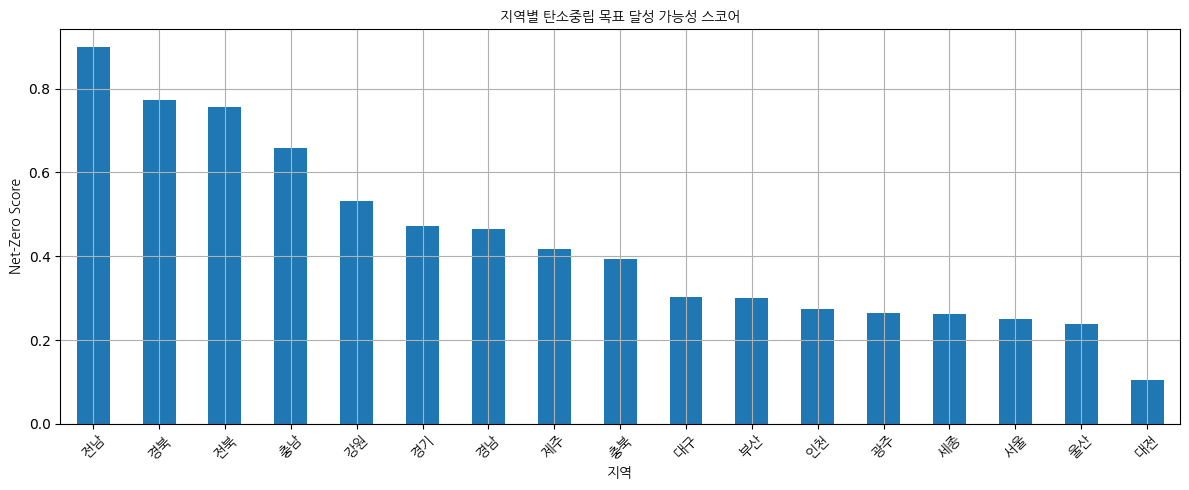

In [46]:
netzero_scores.plot(kind='bar', figsize=(12, 5), legend=False)
plt.title("지역별 탄소중립 목표 달성 가능성 스코어", fontproperties=font_prop)
plt.ylabel("Net-Zero Score", fontproperties=font_prop)
plt.xlabel("지역", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
#위험 지역 사전 식별
#위험 지역 간주 기준: 평균이용률&발전/설비 다양성& 계약용량은 전체 1Q보다 낮은 지역
#탄소중립 달성 스코어가 0.4미만인 지역
#위 4가지 조건중 2개 이상 충족하는 지역을 위험 지역으로 간주

def identify_risk_regions(features: pd.DataFrame, netzero_scores: pd.DataFrame) -> pd.DataFrame:
    # 지역별 다양성 평균 계산
    features = features.copy()
    features['평균다양성'] = (features['설비다양성'] + features['발전다양성']) / 2

    # 기준값 계산 (1사분위수 기준)
    q1_eff = features['평균이용률'].quantile(0.25)
    q1_div = features['평균다양성'].quantile(0.25)
    q1_contract = features['계약용량'].quantile(0.25)
    low_score_threshold = 0.4

    # 탄소중립 스코어 결합
    data = features.join(netzero_scores)

    # 위험 조건들
    is_low_eff = data['평균이용률'] < q1_eff
    is_low_div = data['평균다양성'] < q1_div
    is_low_contract = data['계약용량'] < q1_contract
    is_low_score = data['탄소중립_달성_스코어'] < low_score_threshold

    # 위험 조건 만족 개수
    data['위험조건충족수'] = (
        is_low_eff.astype(int) +
        is_low_div.astype(int) +
        is_low_contract.astype(int) +
        is_low_score.astype(int)
    )

    # 위험 지역 필터링 (2개 이상 충족 시)
    risk_regions = data[data['위험조건충족수'] >= 2].copy()

    # 보기 좋은 정렬된 결과 반환
    return risk_regions.sort_values(by='탄소중립_달성_스코어')[
        ['총설비용량', '평균이용률', '평균다양성', '계약용량', '탄소중립_달성_스코어', '위험조건충족수']
    ]


In [49]:
risk_df = identify_risk_regions(features, netzero_scores)

print("사전 식별된 위험 지역 목록:")
display(risk_df[['총설비용량', '평균이용률','평균다양성', '계약용량', '탄소중립_달성_스코어', '위험조건충족수']].round(2))

사전 식별된 위험 지역 목록:


,총설비용량,평균이용률,평균다양성,계약용량,탄소중립_달성_스코어,위험조건충족수
지역,,,,,,
대전,63.75,0.94,25.31,5049.76,0.10,4
울산,139.92,2.17,75.81,6863.89,0.24,2
서울,53.53,2.36,29.79,967.00,0.25,3
세종,93.23,2.43,39.00,3880.81,0.26,3
광주,354.25,2.23,119.36,26522.77,0.27,2
인천,306.14,2.46,74.00,2918.63,0.27,3
충북,2066.24,1.95,669.93,138272.89,0.39,2


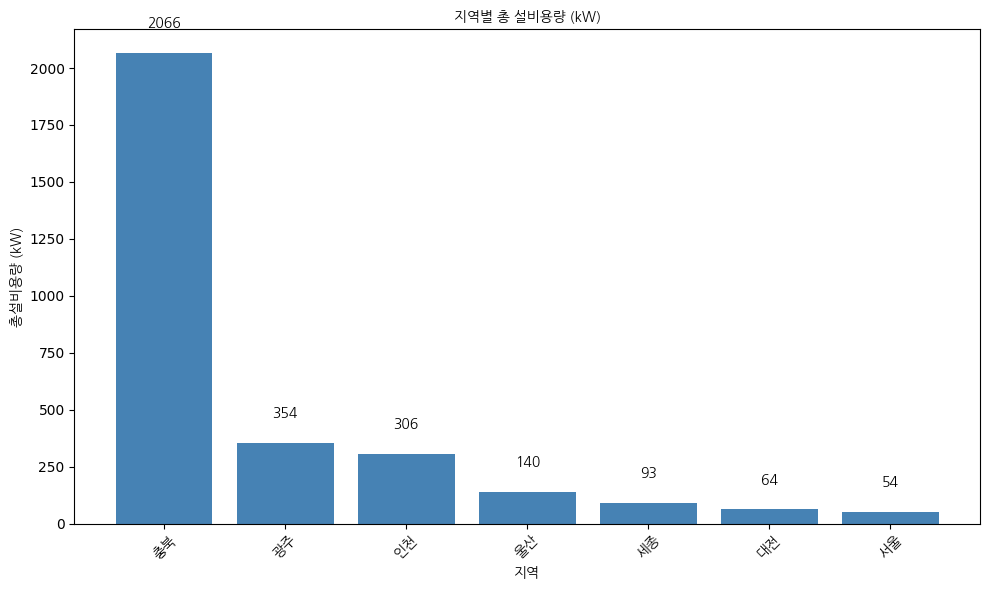

In [73]:
#총설비용량
import matplotlib.pyplot as plt

# 정렬된 데이터
sorted_df = risk_df.sort_values('총설비용량', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_df.index, sorted_df['총설비용량'], color='steelblue')

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100,
             f"{yval:.0f}", ha='center', va='bottom', fontproperties=font_prop)

# 제목 및 라벨 설정
plt.title("지역별 총 설비용량 (kW)", fontproperties=font_prop)
plt.ylabel("총설비용량 (kW)", fontproperties=font_prop)
plt.xlabel("지역", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()


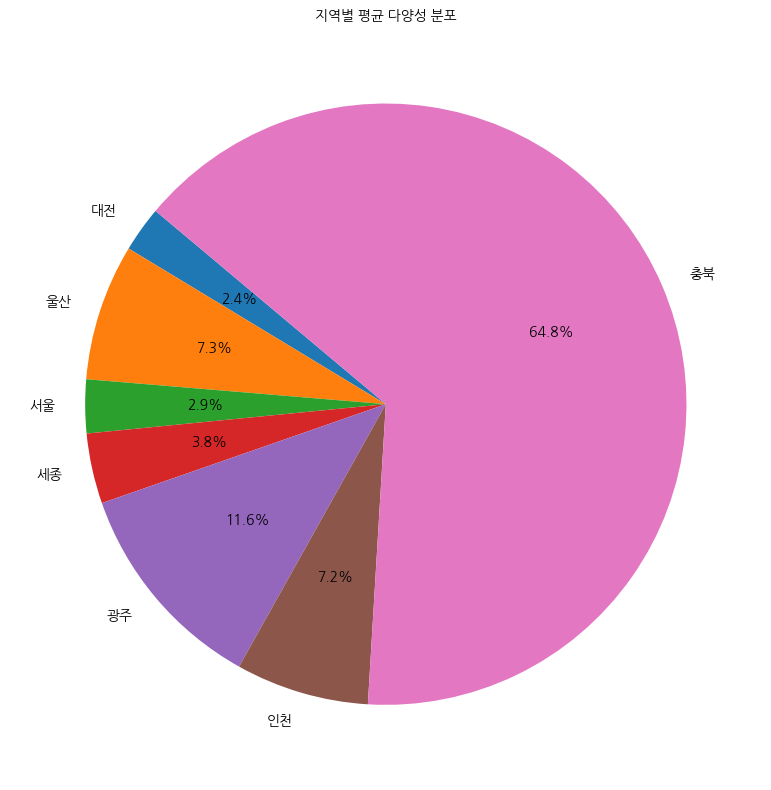

In [74]:
#평균 다양성
labels = risk_df.index
sizes = risk_df['평균다양성']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=140,
        textprops={'fontproperties': font_prop})
plt.title("지역별 평균 다양성 분포", fontproperties=font_prop)
plt.tight_layout()
plt.show()


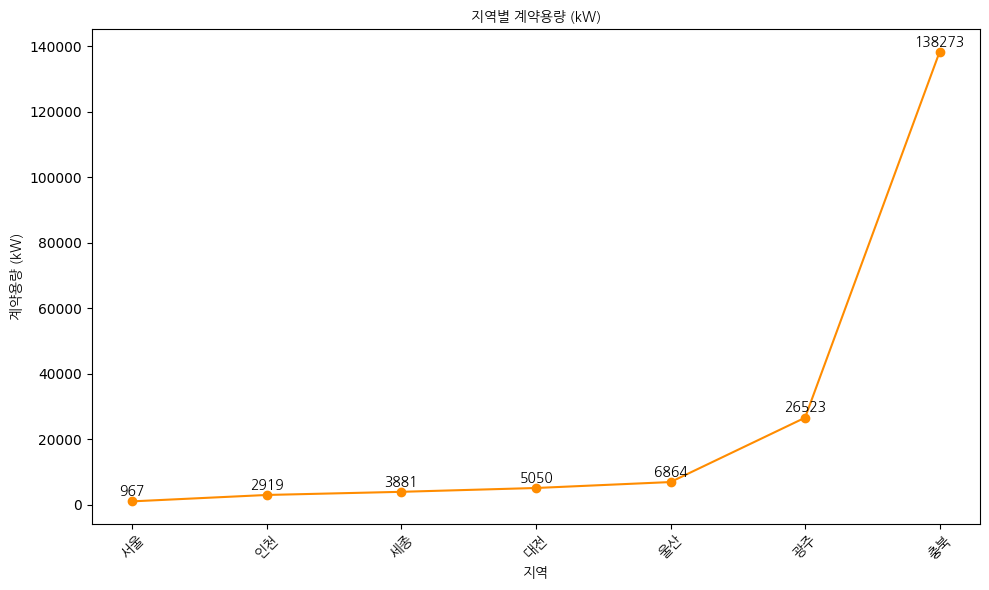

In [75]:
#계약용량
sorted_df = risk_df.sort_values('계약용량')

plt.figure(figsize=(10, 6))
plt.plot(sorted_df.index, sorted_df['계약용량'], marker='o', linestyle='-', color='darkorange')

# 수치 표시
for i, value in enumerate(sorted_df['계약용량']):
    plt.text(i, value + 1000, f"{value:.0f}", ha='center', va='bottom', fontproperties=font_prop)

plt.title("지역별 계약용량 (kW)", fontproperties=font_prop)
plt.ylabel("계약용량 (kW)", fontproperties=font_prop)
plt.xlabel("지역", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

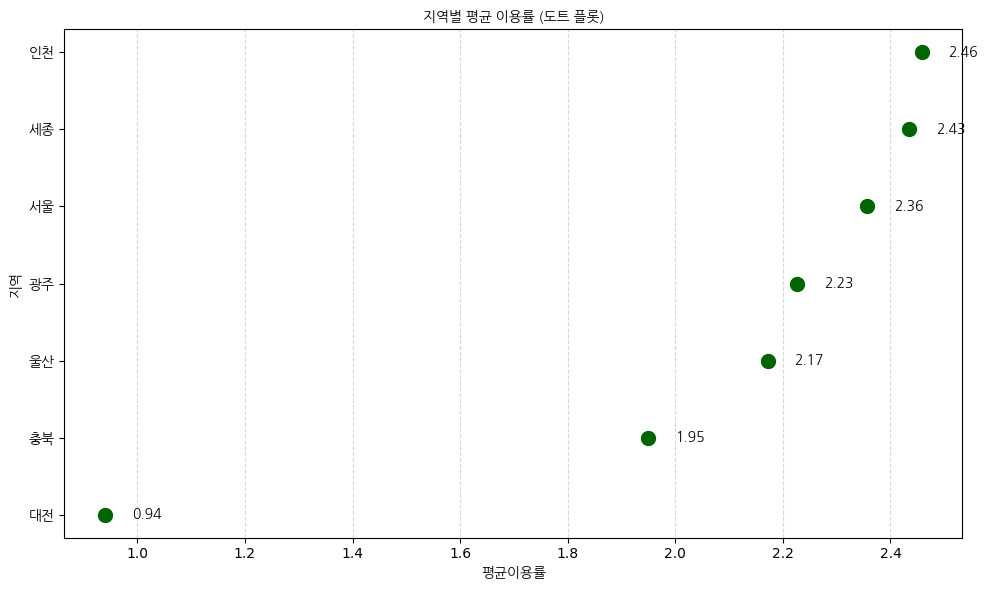

In [77]:
#평균이용률
# 정렬된 데이터
sorted_df = risk_df.sort_values('평균이용률')

plt.figure(figsize=(10, 6))
plt.scatter(sorted_df['평균이용률'], sorted_df.index, color='darkgreen', s=100)

# 값 라벨 추가
for i, (region, row) in enumerate(sorted_df.iterrows()):
    plt.text(row['평균이용률'] + 0.05, i, f"{row['평균이용률']:.2f}",
             va='center', fontproperties=font_prop)

plt.title("지역별 평균 이용률 (도트 플롯)", fontproperties=font_prop)
plt.xlabel("평균이용률", fontproperties=font_prop)
plt.ylabel("지역", fontproperties=font_prop)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(ticks=range(len(sorted_df.index)), labels=sorted_df.index, fontproperties=font_prop)
plt.tight_layout()
plt.show()


In [65]:
#위험 지역 시각화
!pip install folium
import folium
from folium.features import DivIcon

# 시도별 중심 좌표 사전
region_coords = {
    '서울': [37.5665, 126.9780],
    '부산': [35.1796, 129.0756],
    '대구': [35.8714, 128.6014],
    '인천': [37.4563, 126.7052],
    '광주': [35.1595, 126.8526],
    '대전': [36.3504, 127.3845],
    '울산': [35.5384, 129.3114],
    '세종': [36.4800, 127.2890],
    '경기': [37.4138, 127.5183],
    '강원': [37.8228, 128.1555],
    '충북': [36.6358, 127.4917],
    '충남': [36.5184, 126.8000],
    '전북': [35.7167, 127.1442],
    '전남': [34.8161, 126.4630],
    '경북': [36.4919, 128.8889],
    '경남': [35.4606, 128.2132],
    '제주': [33.4996, 126.5312],
}

# 지도 시각화 함수
def plot_risk_regions_map_with_labels(risk_df: pd.DataFrame):
    m = folium.Map(location=[36.5, 127.8], zoom_start=7)

    for region, row in risk_df.iterrows():
        if region not in region_coords:
            continue

        lat, lon = region_coords[region]
        score = row['탄소중립_달성_스코어']
        risk_count = int(row['위험조건충족수'])

        # 마커 (색상은 위험 조건 개수 기준)
        folium.CircleMarker(
            location=[lat, lon],
            radius=7 + risk_count,
            color='red' if risk_count >= 3 else 'orange',
            fill=True,
            fill_color='red' if risk_count >= 3 else 'orange',
            fill_opacity=0.8
        ).add_to(m)

        # 지도 위에 항상 보이는 텍스트 라벨 (DivIcon)
        folium.map.Marker(
            [lat + 0.15, lon],
            icon=DivIcon(
                icon_size=(200, 40),
                icon_anchor=(0, 0),
                html=(
                    f'<div style="font-size:8pt; color:blue; '
                    f'background-color:rgba(255,255,255,0.6); padding:2px 4px; border-radius:4px;">'
                    f'<b>{region}</b><br>'
                    f'위험조건충족수: {risk_count}'
                    f'</div>'
                )
            )
        ).add_to(m)

    return m
map_obj = plot_risk_regions_map_with_labels(risk_df)
map_obj

In [78]:
#그럼 변수들 다 종합해서, 위험지역중에서 그나마 벗어날 기준이 높은 지역들 순서대로
#위험지역 중 설비용량 / 이용률 / 다양성 / 계약용량이 상대적으로 높은 지역일수록 점수를 높게부여해 정렬
# 0~1 정규화
scored_df = risk_df.copy()
scored_df['설비점수'] = scored_df['총설비용량'] / scored_df['총설비용량'].max()
scored_df['이용률점수'] = scored_df['평균이용률'] / scored_df['평균이용률'].max()
scored_df['다양성점수'] = scored_df['평균다양성'] / scored_df['평균다양성'].max()
scored_df['계약점수'] = scored_df['계약용량'] / scored_df['계약용량'].max()

# 가중합: 총합 1.0 기준 (임의로 0.25씩 동일 가중치 적용)
scored_df['위험탈출_가능성스코어'] = (
    0.25 * scored_df['설비점수'] +
    0.25 * scored_df['이용률점수'] +
    0.25 * scored_df['다양성점수'] +
    0.25 * scored_df['계약점수']
)

# 상위부터 정렬
scored_df_sorted = scored_df.sort_values('위험탈출_가능성스코어', ascending=False)

# 출력
print("✅ 위험지역 중 상대적으로 개선 여지가 높은 지역 순위:")
display(scored_df_sorted[['총설비용량', '평균이용률', '평균다양성', '계약용량', '위험조건충족수', '위험탈출_가능성스코어']].round(2))
#충북이 제일 높고 대전이 제일 낮음.
#대전같은 지역은 열악함으로 정책적으로나 종합적으로 집중 관리가 필요함.

✅ 위험지역 중 상대적으로 개선 여지가 높은 지역 순위:


,총설비용량,평균이용률,평균다양성,계약용량,위험조건충족수,위험탈출_가능성스코어
지역,,,,,,
충북,2066.24,1.95,669.93,138272.89,2,0.95
광주,354.25,2.23,119.36,26522.77,2,0.36
인천,306.14,2.46,74.00,2918.63,3,0.32
세종,93.23,2.43,39.00,3880.81,3,0.28
울산,139.92,2.17,75.81,6863.89,2,0.28
서울,53.53,2.36,29.79,967.00,3,0.26
대전,63.75,0.94,25.31,5049.76,4,0.12
